atlas has shape ['x', 'y', 'z', 'region'] = (30, 36, 30, 100)


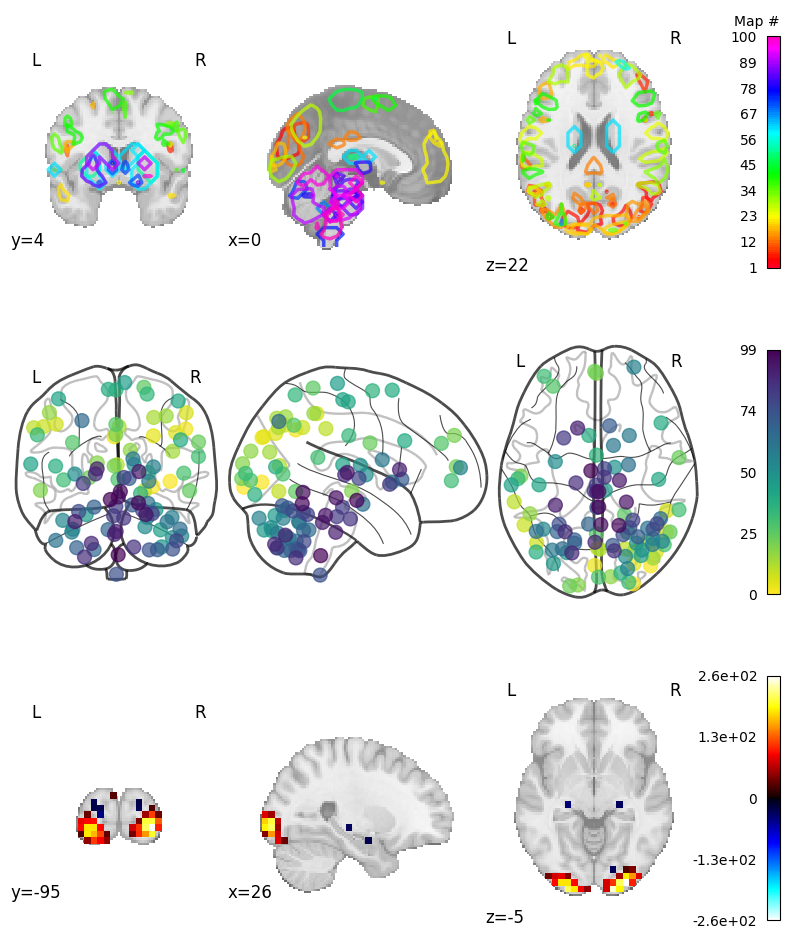

In [1]:
from nilearn import image, plotting
import matplotlib.pyplot as plt
import numpy as np

atlas = image.load_img("nregions-100_hcp.nii.gz")
atlas = image.threshold_img(atlas, "99.5%") 
print("atlas has shape", ["x", "y", "z", "region"], "=", atlas.shape)

fig, axs = plt.subplots(nrows=3, figsize=(10, 12))

# plot atlas, all regions
plotting.plot_prob_atlas(atlas, colorbar=True, draw_cross=False, axes=axs[0])

# plot atlas, center coordinates
# get the x,y,z coordinates for each of the regions
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
plotting.plot_markers(node_values=np.arange(100), node_coords=atlas_coords, axes=axs[1])

# plot atlas, one region
idx = 0 # first region
atlas_region = image.index_img(atlas, idx)
plotting.plot_stat_map(
    atlas_region, draw_cross=False, axes=axs[2]
)

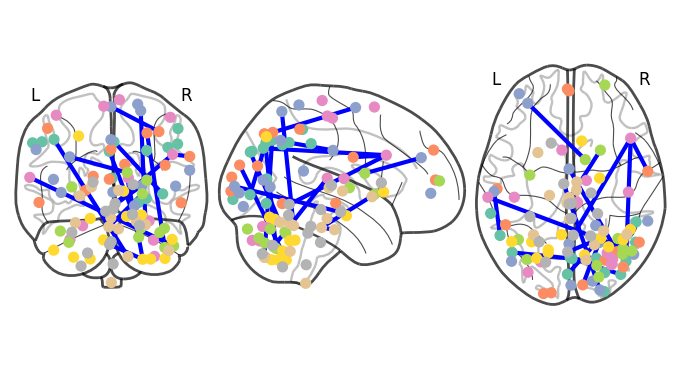

In [2]:
# generate random symmetric matrix
X = np.random.randn(100, 100)
X = (X + X.T) // 2

# plot it on the brain
plotting.plot_connectome(X, atlas_coords, edge_threshold="99.9%")